<a href="https://colab.research.google.com/github/MuneefMumthas/CO653-TEAM-EM/blob/main/CO653-TEAM-EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO653 - Learning Machines and Intelligent Agents

Team mates:

Muneef - 22206529

Entwan - 22135347


###Importing the Libraries

In [206]:
#Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importing the dataset

In [208]:
train = pd.read_csv('/content/drive/MyDrive/Loan_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Loan_test.csv')

train = pd.DataFrame(train)
test = pd.DataFrame(test)

#Exploratory data analysis (EDA)

####Checking the raw dataset

In [209]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [210]:
train.shape

(614, 13)

In [211]:
test.shape

(367, 12)

In [212]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [213]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


###Checking the missing values

In [214]:
# Calculate the percentage of missing values per column
missing_percentage = train.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [215]:
# Calculate the percentage of missing values per column
missing_percentage = test.isnull().mean() * 100

# Display columns with more than 0% missing values
print(missing_percentage[missing_percentage > 0])

Gender              2.997275
Dependents          2.724796
Self_Employed       6.267030
LoanAmount          1.362398
Loan_Amount_Term    1.634877
Credit_History      7.901907
dtype: float64


In [216]:
missing = train[train.isnull().any(axis=1)]
missing

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


###Handling the missing values by replacing with mean

In [217]:
def handle_missing_values(data, threshold=0.5):
    """
    Handles missing values in a dataset:
    - Drops columns with more than a specified threshold of missing values.
    - Fills remaining missing values with median for numeric columns and mode for categorical columns.

    Parameters:
        data (pd.DataFrame): The input dataset.
        threshold (float): The proportion of missing values above which columns are dropped (default 0.5).

    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Step 2: Fill numeric columns with median
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].median())

    # Step 3: Fill categorical columns with mode
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        if data[col].isnull().sum() > 0:  # Only fill if there are missing values
            data[col] = data[col].fillna(data[col].mode()[0])  # Use the most frequent value

    return data

# Example usage
train = handle_missing_values(train, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [218]:
# Example usage
test = handle_missing_values(test, threshold=0.5)

# Check the result
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [219]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [220]:
train = train.drop("Loan_ID", axis = 1)

In [221]:
test = test.drop("Loan_ID", axis = 1)

###Encoding the categorical columns using lable encorder

In [222]:
# Get categorical columns present in the current DataFrame
categorical_columns = train.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
# Dictionary to store mappings
label_mappings_train = {}


for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])
    label_mappings_train[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [223]:
# Get categorical columns present in the current DataFrame
categorical_columns = test.select_dtypes(include=['object', 'category',]).columns


label_mappings_test = {}

for column in categorical_columns:
    test[column] = label_encoder.fit_transform(test[column])
    label_mappings_test[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [224]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['Loan_Amount_Term'] = scaler.fit_transform(train[['Loan_Amount_Term']])
test['Loan_Amount_Term'] = scaler.fit_transform(test[['Loan_Amount_Term']])

####Mappings for the encorder

In [225]:
# Print the mappings
for col, mapping in label_mappings_train.items():
    print(f"Column: {col}")
    print(mapping)
    print()

Column: Gender
{'Female': np.int64(0), 'Male': np.int64(1)}

Column: Married
{'No': np.int64(0), 'Yes': np.int64(1)}

Column: Dependents
{'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3+': np.int64(3)}

Column: Education
{'Graduate': np.int64(0), 'Not Graduate': np.int64(1)}

Column: Self_Employed
{'No': np.int64(0), 'Yes': np.int64(1)}

Column: Property_Area
{'Rural': np.int64(0), 'Semiurban': np.int64(1), 'Urban': np.int64(2)}

Column: Loan_Status
{'N': np.int64(0), 'Y': np.int64(1)}



In [226]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,0.74359,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,0.74359,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,0.74359,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,0.74359,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,0.74359,1.0,2,1


In [227]:
# Print the mappings
for col, mapping in label_mappings_test.items():
    print(f"Column: {col}")
    print(mapping)
    print()

Column: Gender
{'Female': np.int64(0), 'Male': np.int64(1)}

Column: Married
{'No': np.int64(0), 'Yes': np.int64(1)}

Column: Dependents
{'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3+': np.int64(3)}

Column: Education
{'Graduate': np.int64(0), 'Not Graduate': np.int64(1)}

Column: Self_Employed
{'No': np.int64(0), 'Yes': np.int64(1)}

Column: Property_Area
{'Rural': np.int64(0), 'Semiurban': np.int64(1), 'Urban': np.int64(2)}



In [228]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,0.74359,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,0.74359,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,0.74359,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,0.74359,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,0.74359,1.0,2,1


In [229]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,0.746835,1.0,2
1,1,1,1,0,0,3076,1500,126.0,0.746835,1.0,2
2,1,1,2,0,0,5000,1800,208.0,0.746835,1.0,2
3,1,1,2,0,0,2340,2546,100.0,0.746835,1.0,2
4,1,0,0,1,0,3276,0,78.0,0.746835,1.0,2


In [230]:
train["ApplicantIncome"].describe()

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


In [231]:
train["LoanAmount"].describe()

,LoanAmount
count,614.000000
mean,145.752443
std,84.107233
min,9.000000
25%,100.250000
50%,128.000000
75%,164.750000
max,700.000000


In [232]:
unique = train["Loan_Amount_Term"].unique()
unique

array([0.74358974, 0.23076923, 0.48717949, 0.35897436, 0.1025641 ,
       0.61538462, 1.        , 0.05128205, 0.15384615, 0.        ])

###Scaling the numerical columns using standard scaling

In [233]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical columns that need scaling
high_num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Create a copy of the DataFrame (optional, to avoid modifying the original)
train_scaled = train.copy()
test_scaled = test.copy()


scaler = MinMaxScaler()
train_scaled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    train_scaled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)
test_scaled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    test_scaled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)



In [234]:
train_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


###Plots to view the distributions

####Box plots

<Axes: ylabel='CoapplicantIncome'>

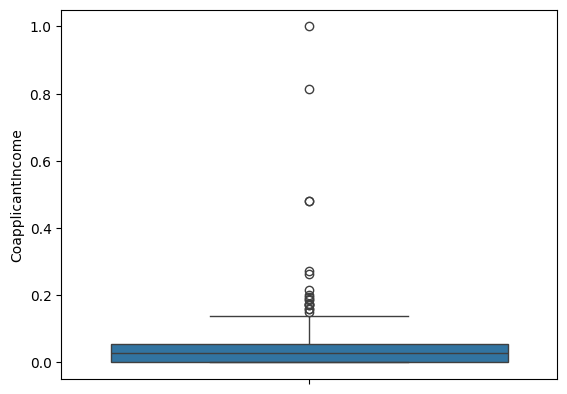

In [235]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train_scaled["CoapplicantIncome"])

<Axes: ylabel='LoanAmount'>

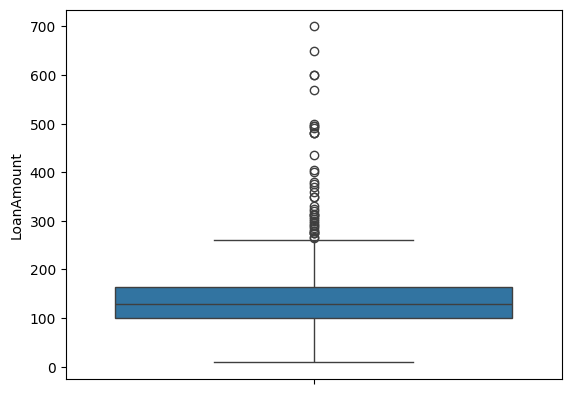

In [236]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["LoanAmount"])

<Axes: ylabel='ApplicantIncome'>

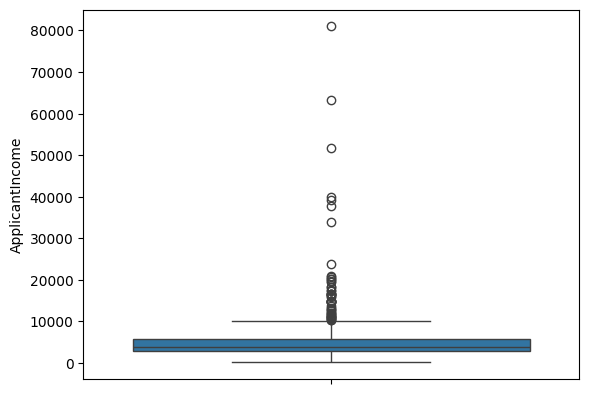

In [237]:
'ApplicantIncome	CoapplicantIncome	LoanAmount'

sns.boxplot(train["ApplicantIncome"])

####Count plots

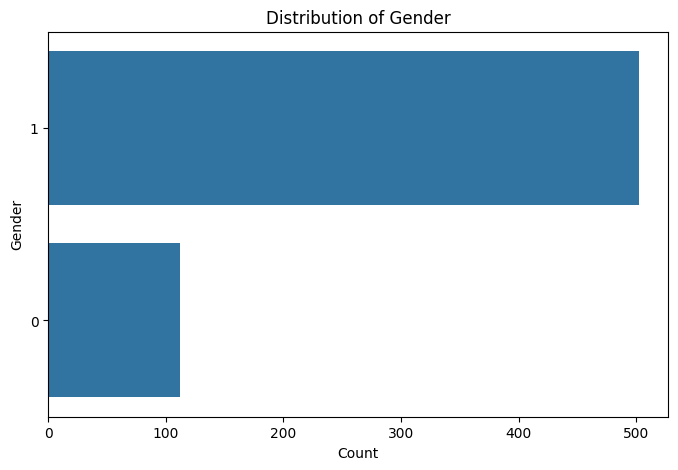

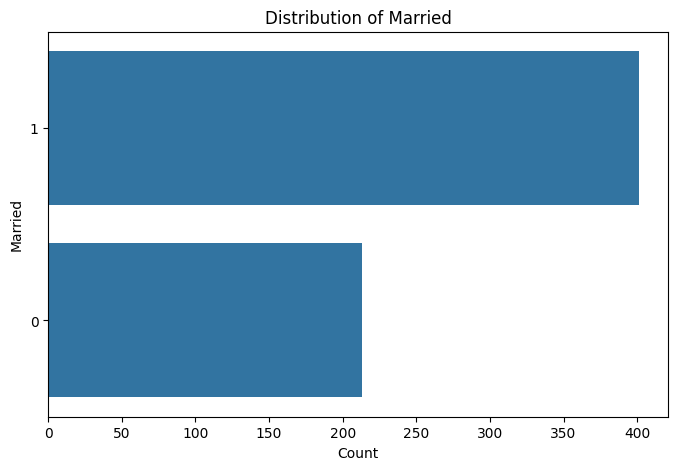

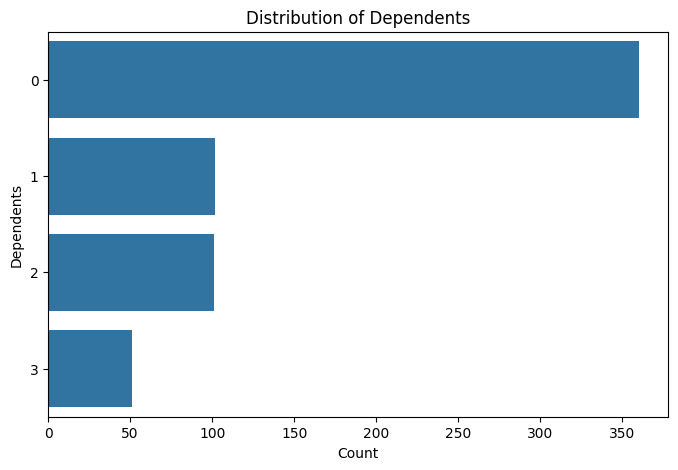

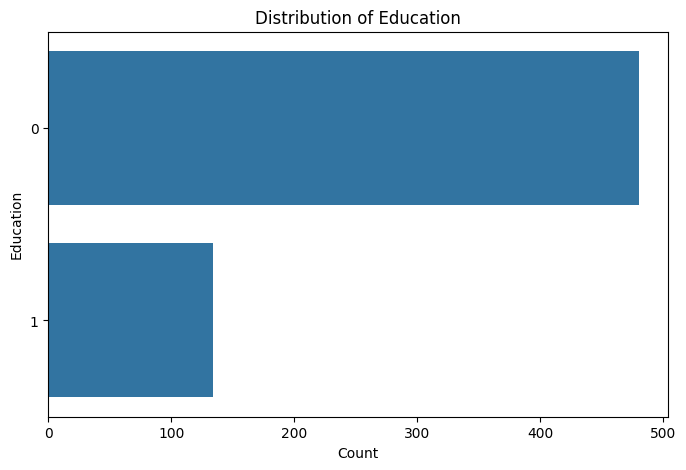

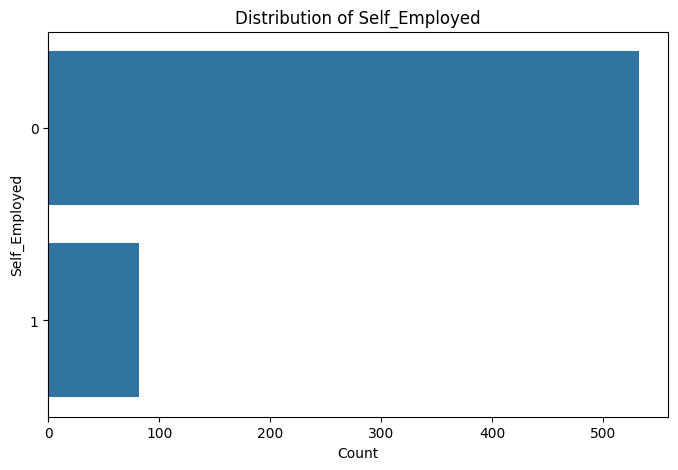

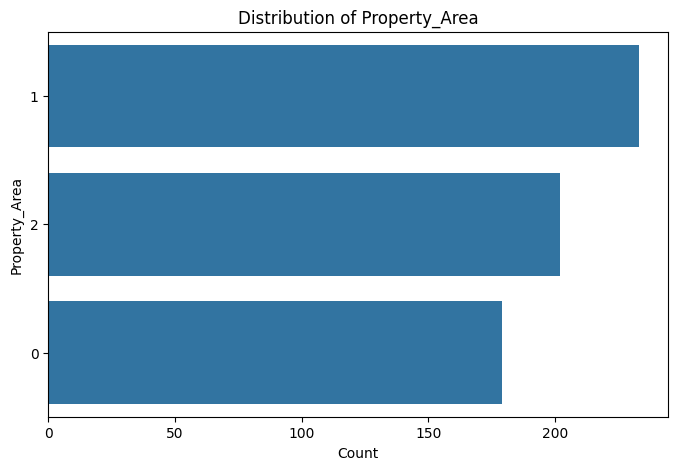

In [238]:
# Plot categorical feature distributions
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=train_scaled[col], order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

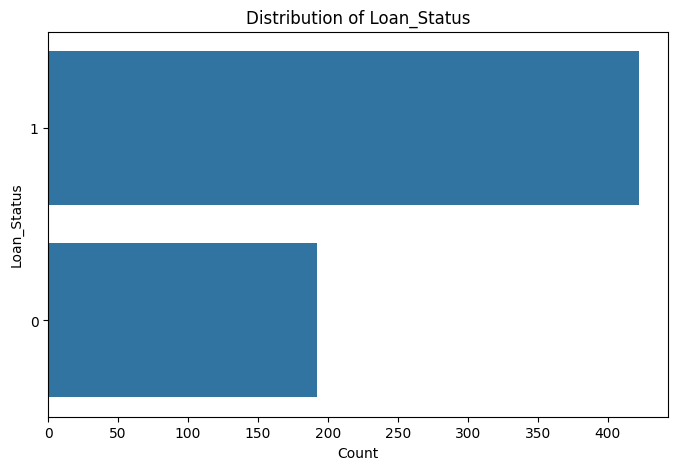

In [239]:
# Plot categorical feature distributions

plt.figure(figsize=(8, 5))
sns.countplot(y=train_scaled["Loan_Status"], order=train["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

####Heatmap

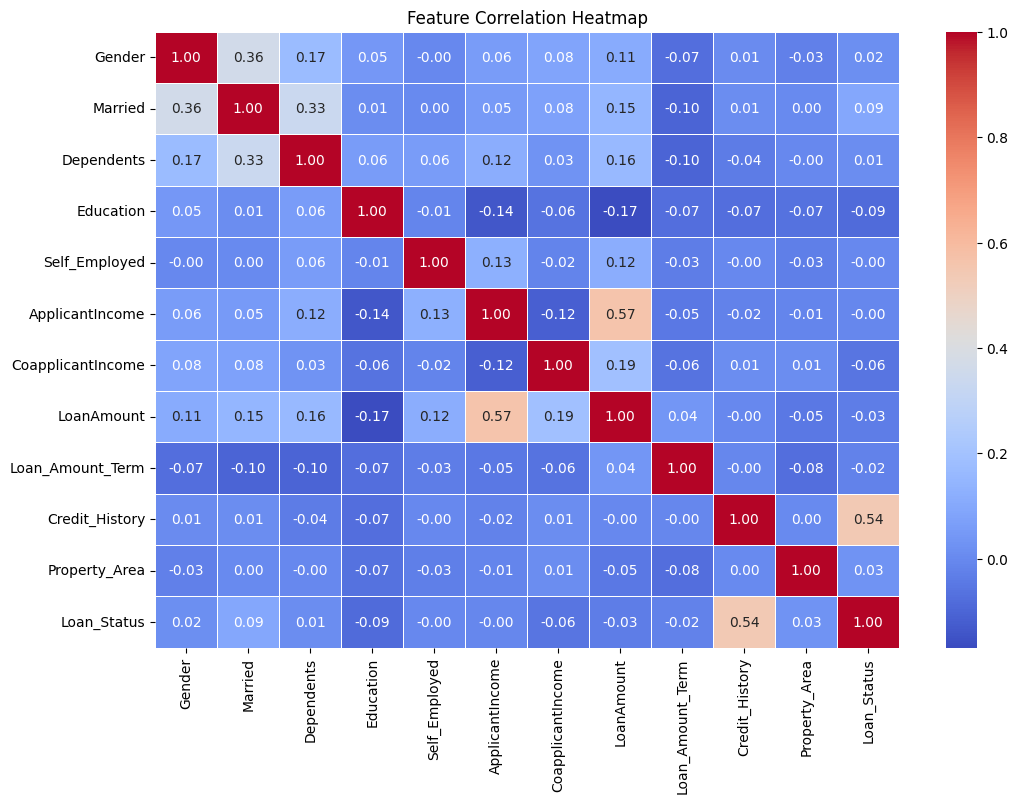

In [240]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


####Pairplot

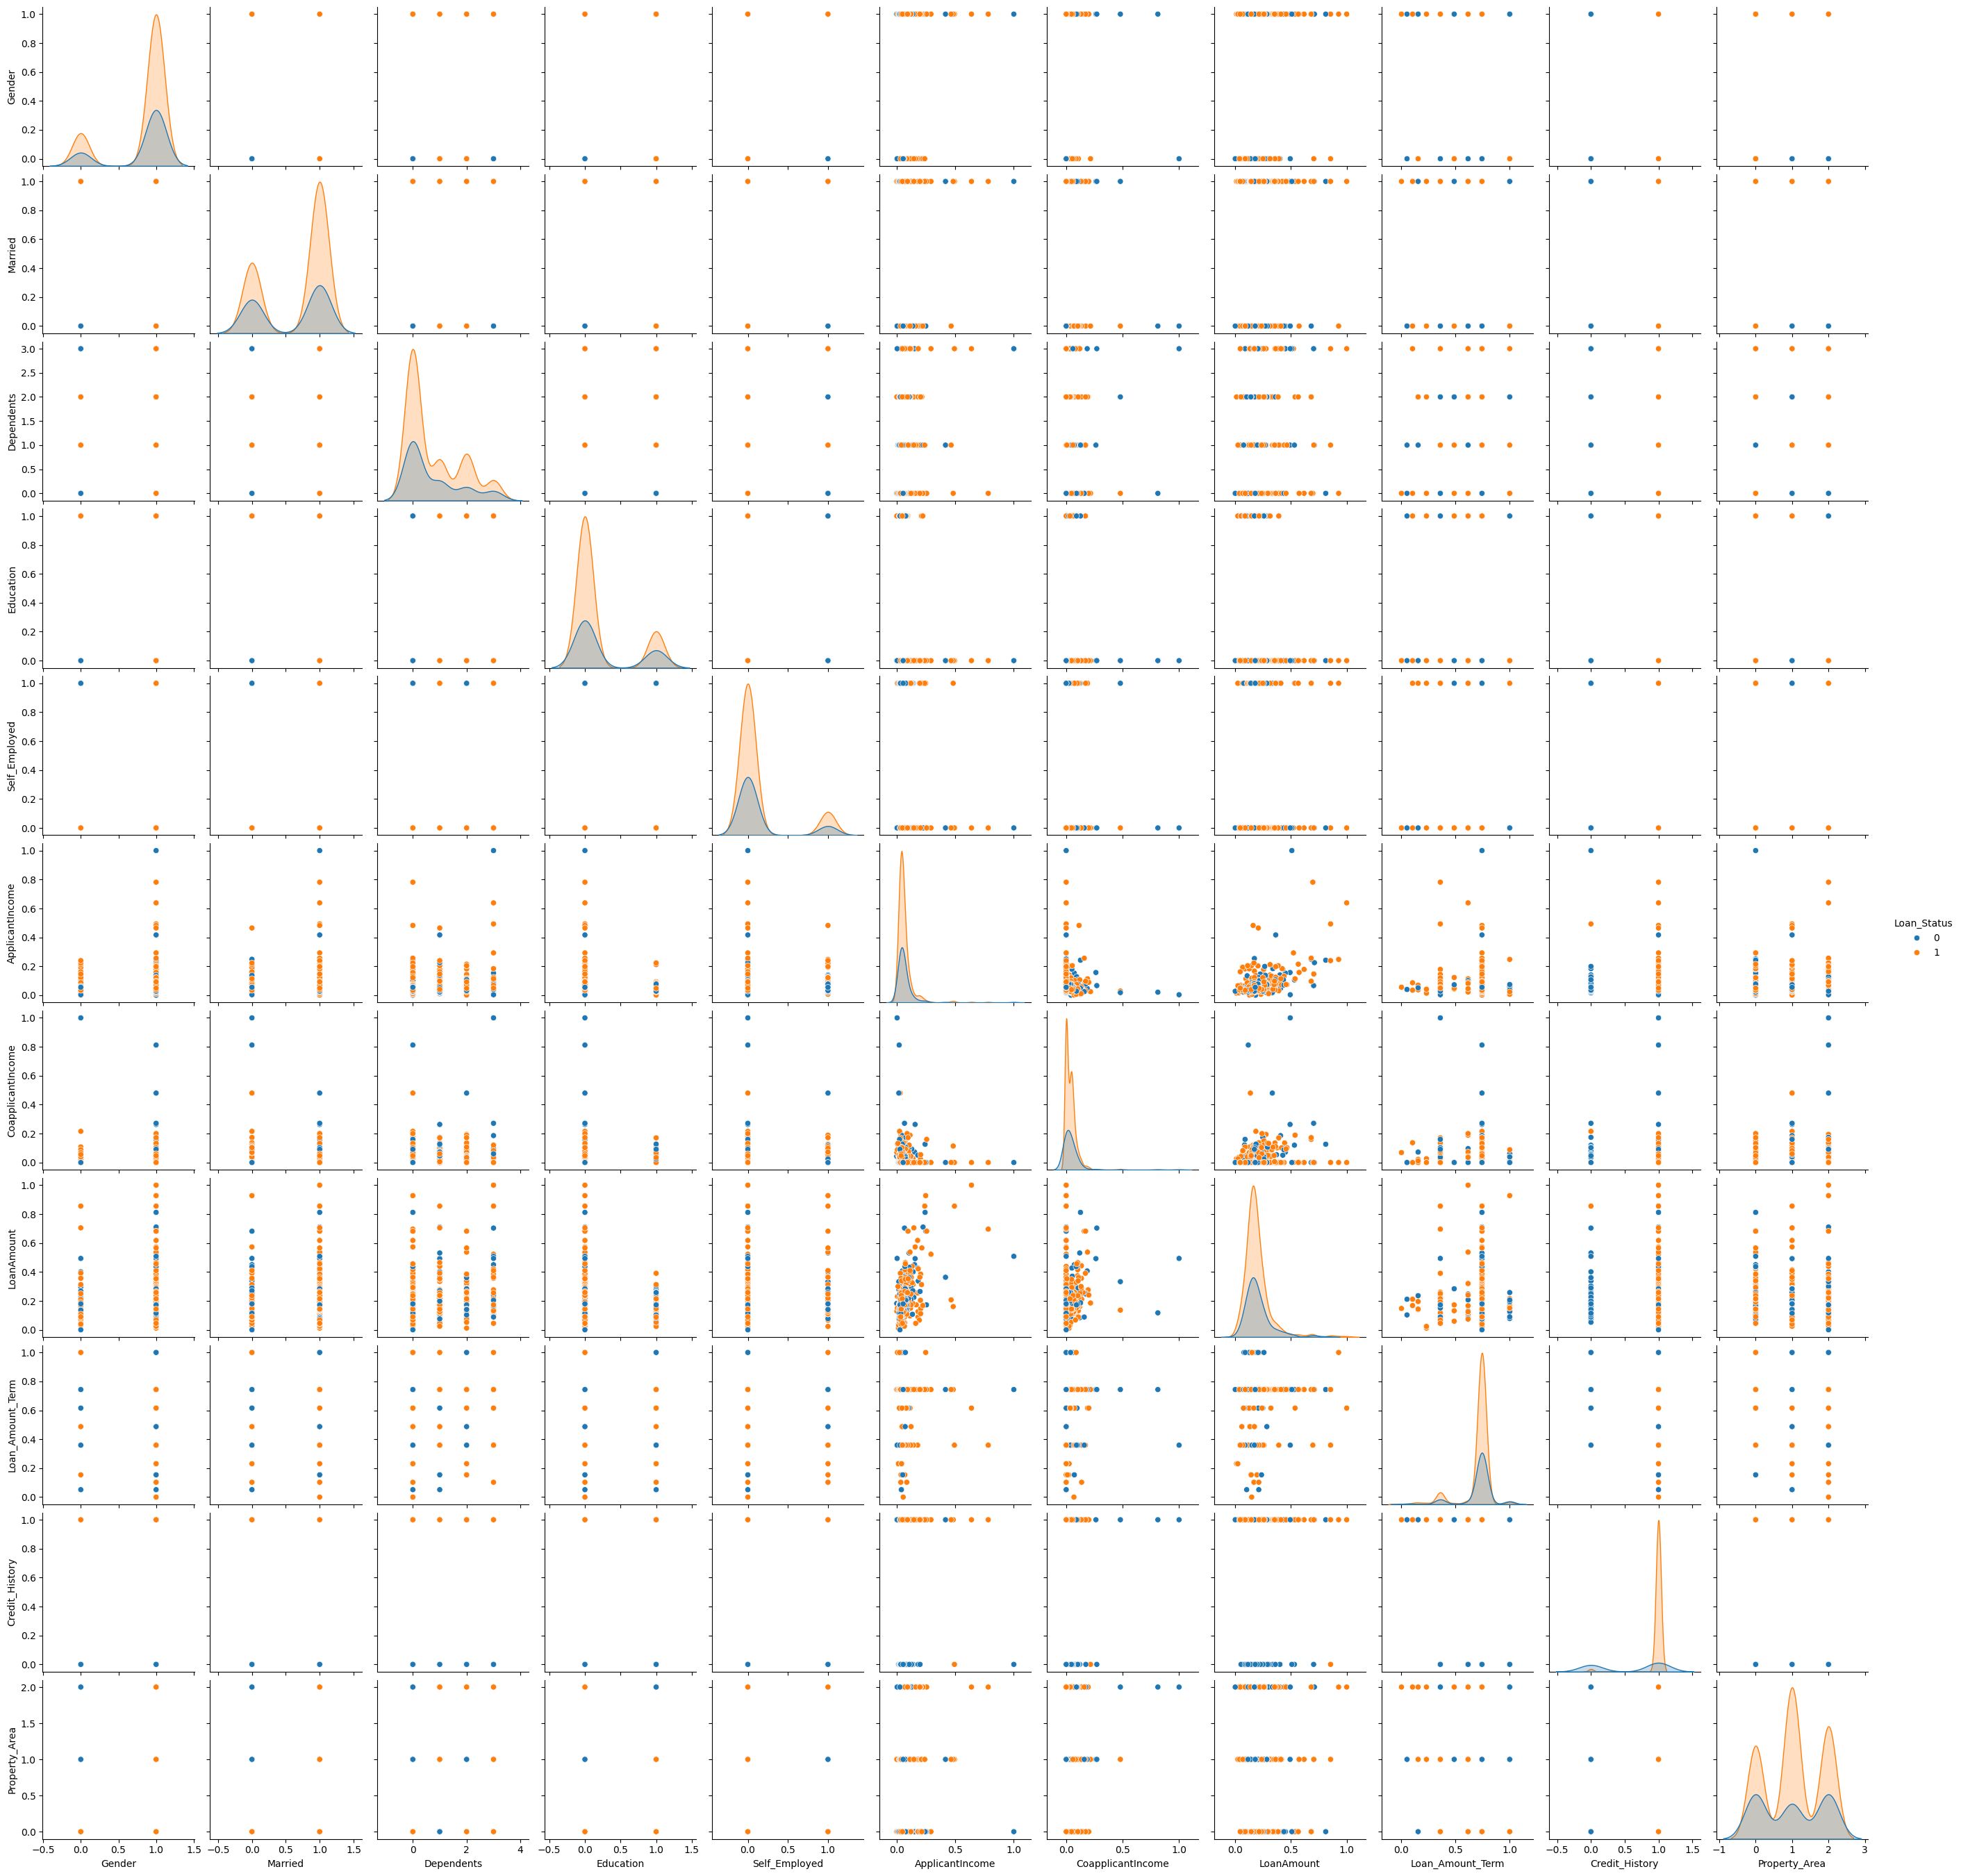

In [241]:
sns.pairplot(train_scaled, hue="Loan_Status")
plt.show()

#Building the model

###Upsampling and downsampling the train data

In my experience:
When I upsample then split into train test, there is a chance of getting overfit because some of the test values are already seen.

But in this we already have the seperate test data we can upsample here.

In [242]:
# Separate majority and minority classes
df_majority = train_scaled[train_scaled["Loan_Status"] == 1]
df_minority = train_scaled[train_scaled["Loan_Status"] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class count
                                 random_state=42)  # Ensure reproducibility

# Combine majority class with upsampled minority class
train_upsample = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
train_upsample = train_upsample.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution after upsampling
print(train_upsample["Loan_Status"].value_counts())

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # No replacement (randomly remove samples)
                                   n_samples=len(df_minority),  # Match minority class count
                                   random_state=42)  # Ensure reproducibility

# Check class distribution after downsampling
print(train_upsample["Loan_Status"].value_counts())


Loan_Status
0    422
1    422
Name: count, dtype: int64
Loan_Status
0    422
1    422
Name: count, dtype: int64


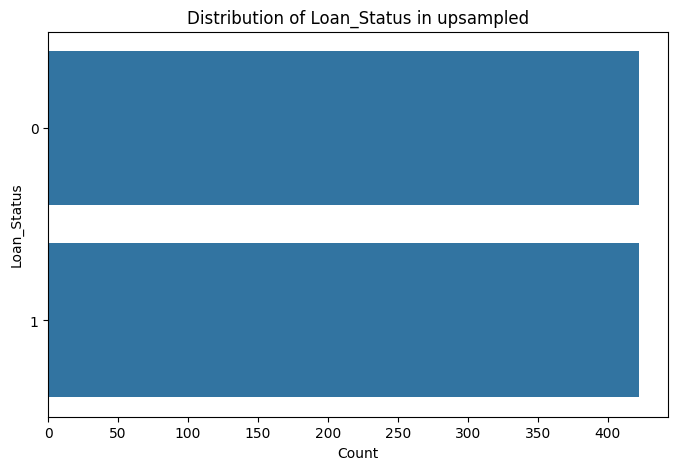

In [243]:
plt.figure(figsize=(8, 5))
sns.countplot(y=train_upsample["Loan_Status"], order=train_upsample["Loan_Status"].value_counts().index)
plt.title(f"Distribution of Loan_Status in upsampled")
plt.xlabel("Count")
plt.ylabel("Loan_Status")
plt.show()

In [244]:
train_upsample.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,2,0,1,0.017934,0.479996,0.332851,0.743590,1.0,2,0
1,1,1,1,1,0,0.040186,0.039360,0.147612,0.358974,1.0,2,1
2,1,1,2,0,1,0.031861,0.000000,0.140376,0.743590,0.0,1,0
3,0,0,1,1,1,0.045974,0.000000,0.076700,0.743590,1.0,1,0
4,1,1,0,0,0,0.019901,0.084983,0.176556,0.743590,1.0,1,1


In [245]:
train_upsample.to_csv("/content/drive/MyDrive/cleaned.csv", index=False)

###Training the model


In [246]:
# Assume df is your dataset
X = train_upsample.drop(columns=["Loan_Status"])  # Features
y = train_upsample["Loan_Status"]  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split dataset (80% training, 20% testing)


# Display the shapes of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((675, 11), (169, 11), (675,), (169,))

In [247]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
468,1,1,3,1,1,0.068683,0.000000,0.175109,0.743590,1.0,0
786,1,1,0,0,0,0.030303,0.083999,0.153401,0.743590,1.0,2
538,1,1,1,0,1,0.027767,0.000000,0.172214,0.743590,1.0,1
266,1,1,0,1,0,0.072764,0.000000,0.218524,0.743590,1.0,2
352,1,1,2,0,1,0.113457,0.188950,0.536903,0.615385,1.0,0


In [248]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [249]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [250]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1, restore_best_weights=True)

In [251]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [252]:
# Define Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce LR when validation loss stops improving
    factor=0.5,          # Reduce LR by a factor of 0.5
    patience=3,          # Wait for 3 epochs before reducing LR
    min_lr=0.00001       # Minimum LR to prevent over-reduction
)

In [253]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    tf.keras.layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    tf.keras.layers.Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduce LR for better convergence
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [254]:
# Train the Model with LR Scheduler
history = model_1.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[mc, early_stopping, lr_scheduler],  # Add lr_scheduler here
    verbose=1
)

Epoch 1/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7134 - loss: 0.5737

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7152 - loss: 0.5717 - val_accuracy: 0.5858 - val_loss: 0.7909 - learning_rate: 5.0000e-04
Epoch 2/50
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.6006   

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7001 - loss: 0.5940 - val_accuracy: 0.5858 - val_loss: 0.7263 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7378 - loss: 0.5391 - val_accuracy: 0.5680 - val_loss: 0.7287 - learning_rate: 5.0000e-04
Epoch 4/50
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5440  

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7050 - loss: 0.5401 - val_accuracy: 0.6036 - val_loss: 0.7102 - learning_rate: 5.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7305 - loss: 0.5375 - val_accuracy: 0.6154 - val_loss: 0.7112 - learning_rate: 5.0000e-04
Epoch 6/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5635  

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7225 - loss: 0.5566 - val_accuracy: 0.6213 - val_loss: 0.6935 - learning_rate: 5.0000e-04
Epoch 7/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.5518  

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6953 - loss: 0.5516 - val_accuracy: 0.6627 - val_loss: 0.6625 - learning_rate: 5.0000e-04
Epoch 8/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.5217 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7538 - loss: 0.5240 - val_accuracy: 0.6627 - val_loss: 0.6448 - learning_rate: 5.0000e-04
Epoch 9/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7308 - loss: 0.5143 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7302 - loss: 0.5151 - val_accuracy: 0.6805 - val_loss: 0.6346 - learning_rate: 5.0000e-04
Epoch 10/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.5196 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7252 - loss: 0.5198 - val_accuracy: 0.7101 - val_loss: 0.6238 - learning_rate: 5.0000e-04
Epoch 11/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.4971 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7524 - loss: 0.4970 - val_accuracy: 0.7219 - val_loss: 0.6109 - learning_rate: 5.0000e-04
Epoch 12/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.4892 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7535 - loss: 0.4897 - val_accuracy: 0.7396 - val_loss: 0.6051 - learning_rate: 5.0000e-04
Epoch 13/50
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.4871 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7795 - loss: 0.4893 - val_accuracy: 0.7396 - val_loss: 0.5780 - learning_rate: 5.0000e-04
Epoch 14/50
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7723 - loss: 0.4900 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7698 - loss: 0.4880 - val_accuracy: 0.7515 - val_loss: 0.5623 - learning_rate: 5.0000e-04
Epoch 15/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.4930 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7569 - loss: 0.4972 - val_accuracy: 0.7515 - val_loss: 0.5510 - learning_rate: 5.0000e-04
Epoch 16/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5771  

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7158 - loss: 0.5645 - val_accuracy: 0.7574 - val_loss: 0.5433 - learning_rate: 5.0000e-04
Epoch 17/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.4996 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7416 - loss: 0.4964 - val_accuracy: 0.7574 - val_loss: 0.5394 - learning_rate: 5.0000e-04
Epoch 18/50
16/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5255 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7265 - loss: 0.5156 - val_accuracy: 0.7515 - val_loss: 0.5337 - learning_rate: 5.0000e-04
Epoch 19/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7542 - loss: 0.5242 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7512 - loss: 0.5250 - val_accuracy: 0.7574 - val_loss: 0.5291 - learning_rate: 5.0000e-04
Epoch 20/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.4669 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7612 - loss: 0.4716 - val_accuracy: 0.7692 - val_loss: 0.5219 - learning_rate: 5.0000e-04
Epoch 21/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7920 - loss: 0.4686 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7855 - loss: 0.4744 - val_accuracy: 0.7692 - val_loss: 0.5150 - learning_rate: 5.0000e-04
Epoch 22/50
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7604 - loss: 0.4842 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7613 - loss: 0.4826 - val_accuracy: 0.7633 - val_loss: 0.5054 - learning_rate: 5.0000e-04
Epoch 23/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4590 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7906 - loss: 0.4636 - val_accuracy: 0.7633 - val_loss: 0.5040 - learning_rate: 5.0000e-04
Epoch 24/50
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7826 - loss: 0.4924 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7800 - loss: 0.4910 - val_accuracy: 0.7633 - val_loss: 0.5028 - learning_rate: 5.0000e-04
Epoch 25/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5009 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7389 - loss: 0.5003 - val_accuracy: 0.7751 - val_loss: 0.5015 - learning_rate: 5.0000e-04
Epoch 26/50
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7367 - loss: 0.5069 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7377 - loss: 0.5041 - val_accuracy: 0.7692 - val_loss: 0.4939 - learning_rate: 5.0000e-04
Epoch 27/50
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7591 - loss: 0.4763  

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7579 - loss: 0.4765 - val_accuracy: 0.7692 - val_loss: 0.4897 - learning_rate: 5.0000e-04
Epoch 28/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7831 - loss: 0.4695 - val_accuracy: 0.7633 - val_loss: 0.4909 - learning_rate: 5.0000e-04
Epoch 29/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7328 - loss: 0.5060 - val_accuracy: 0.7751 - val_loss: 0.4925 - learning_rate: 5.0000e-04
Epoch 30/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7360 - loss: 0.5090 - val_accuracy: 0.7574 - val_loss: 0.4928 - learning_rate: 5.0000e-04
Epoch 31/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7828 - loss: 0.4609 - val_accuracy: 0.7633 - val_loss: 0.4950 - learning_rate: 2.5000e-04
Epoch 32/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7467 - loss: 0.4846 - val_accuracy: 0.7574 - val_loss: 0.4973 - learning_rate: 2.5000e-04
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 2

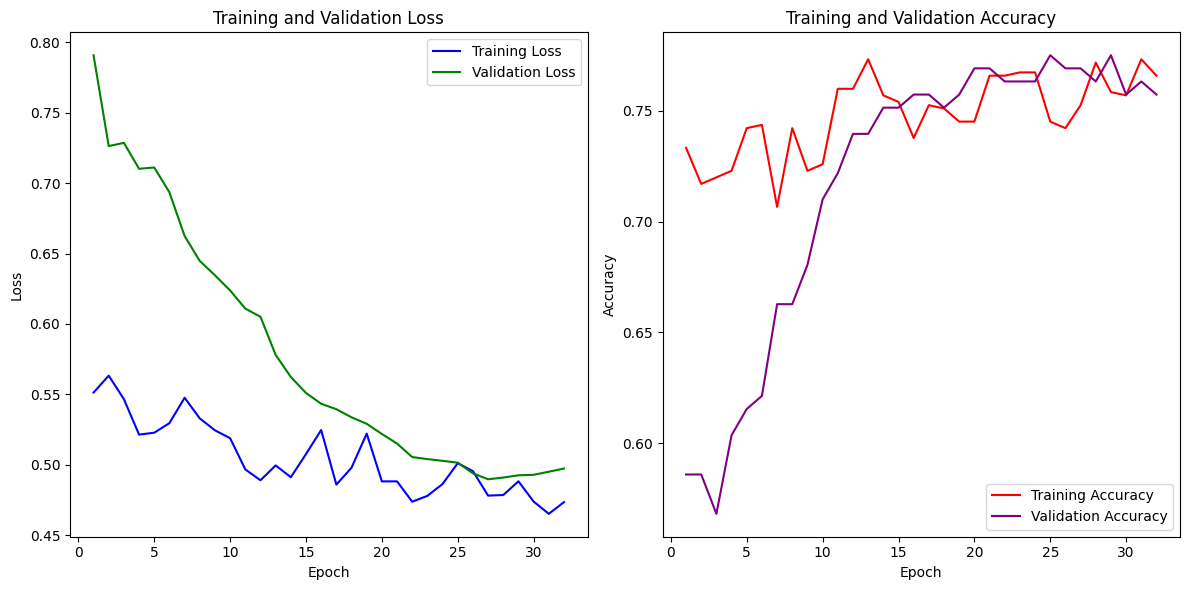

In [255]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting both loss and accuracy in one figure
plt.figure(figsize=(12, 6))

# First subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Second subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', color='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='purple')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [256]:
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")


In [257]:
# Get model predictions
predictions = model.predict(test_scaled, verbose=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [258]:
# Load test dataset
test_data = pd.read_csv("/content/drive/MyDrive/Loan_test.csv")

# Store Loan_ID separately before dropping
loan_ids = test_data["Loan_ID"].values


In [259]:
# Convert predictions to 'Y' and 'N'
predicted_classes = np.where(predictions > 0.5, "Y", "N")

# Ensure Loan_IDs and predictions have the same length
assert len(loan_ids) == len(predicted_classes), "Mismatch in Loan_ID and predictions length!"

# Create a DataFrame for submission
submission = pd.DataFrame({
    "Loan_ID": loan_ids,  # Adding back Loan_ID
    "Loan_Status": predicted_classes.flatten()
})

# Save to CSV
submission.to_csv("/content/drive/MyDrive/submission.csv", index=False)

print("Predictions saved as submission.csv")


Predictions saved as submission.csv


In [260]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Credit_History       0.227931
ApplicantIncome      0.221660
LoanAmount           0.190029
CoapplicantIncome    0.119789
Dependents           0.055329
Property_Area        0.055160
Loan_Amount_Term     0.036068
Married              0.029709
Education            0.025078
Gender               0.020246
Self_Employed        0.019000
dtype: float64
